<h1 align="center"><strong>Criptografía</strong></h1>

- Autor: [Renzo Guerrero Huayta](https://github.com/elterribleabuelo)

# 1.AHash

También llamado Average Hash o Mean Hash, este enfoque convierte la imagen en una imagen de 8x8 en escala de grises y establece los 64 bits en el hash en función de si el valor del píxel es mayor que el color promedio de la imagen.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap17_Criptografía\imagenes")

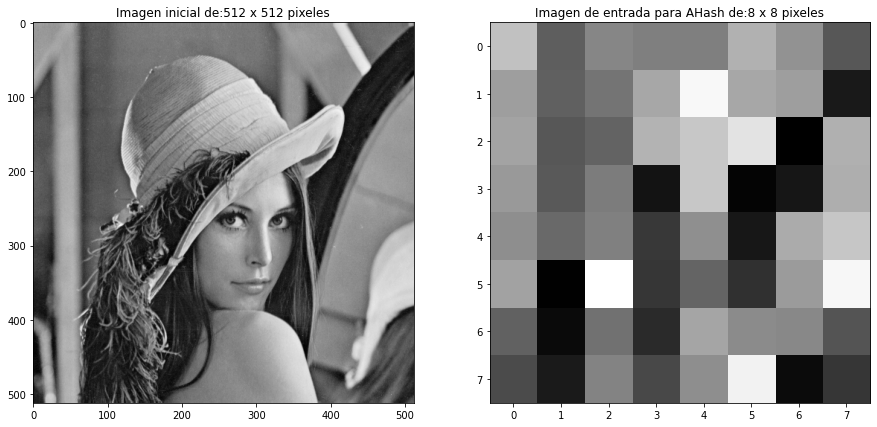

In [70]:
lenna = cv2.imread("Lenna.png")
lenna = cv2.cvtColor(lenna,cv2.COLOR_BGR2GRAY)
hashSize = 8
resized = cv2.resize(lenna, (hashSize, hashSize))

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen inicial de:{} x {} pixeles".format(lenna.shape[0],lenna.shape[1]))
plt.imshow(lenna,cmap='gray')
plt.subplot(1,2,2)
plt.title("Imagen de entrada para AHash de:{} x {} pixeles".format(resized.shape[0],resized.shape[1]))
plt.imshow(resized,cmap='gray')
plt.show()

El AHash de la imagen es: 101110110100110010101111101000011011000011111000010011000011010000011110


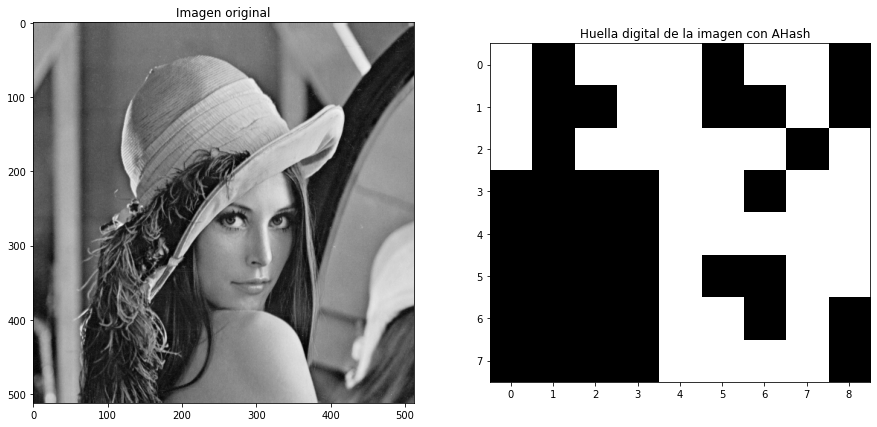

In [66]:
mean_lenna = np.mean(lenna)
hash_lenna = []
huella_ahash = np.zeros((resized.shape[0],resized.shape[1]))

for i in range(resized.shape[0]):
    for j in range(resized.shape[1]):
        if resized[i][j] > mean_lenna:
            hash_lenna.append('1')
            huella_ahash[i][j] = 1
        else:
            hash_lenna.append('0')
            huella_ahash[i][j] = 0

hash_lenna = ''.join(hash_lenna)
print("El AHash de la imagen es: {}".format(hash_lenna))

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(lenna,cmap='gray')
plt.subplot(1,2,2)
plt.title("        Huella digital de la imagen con AHash")
plt.imshow(huella_ahash,cmap='gray')
plt.show()

## Pruebas

In [ ]:
plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen con Filtro Gaussiano")
plt.imshow(gauss,cmap='gray')
plt.subplot(1,2,2)
plt.title("Imagen con DCT")
plt.imshow(dct,cmap='gray')
plt.show()

# 2.PHash

También llamado "Perceptive Hash".Este algoritmo es similar a aHash pero usa una transformada de coseno discreta (DCT) y se compara en función de las frecuencias en lugar de los valores de color.

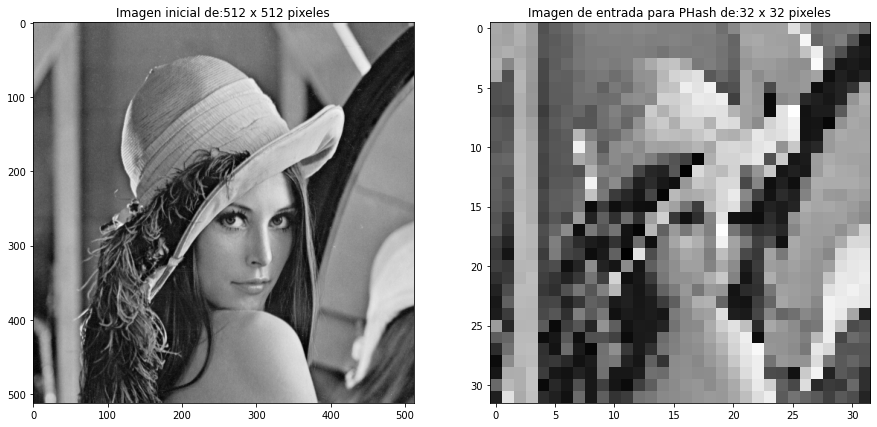

In [2]:
lenna = cv2.imread("Lenna.png")
lenna = cv2.cvtColor(lenna,cv2.COLOR_BGR2GRAY)
hashSize = 32
resized = cv2.resize(lenna, (hashSize, hashSize))
plt.figure(1,figsize=(15,15))

plt.subplot(1,2,1)
plt.title("Imagen inicial de:{} x {} pixeles".format(lenna.shape[0],lenna.shape[1]))
plt.imshow(lenna,cmap='gray')

plt.subplot(1,2,2)
plt.title("Imagen de entrada para PHash de:{} x {} pixeles".format(resized.shape[0],resized.shape[1]))
plt.imshow(resized,cmap='gray')
plt.show()

In [51]:
# Contenedores
B = 32 # tamaño del bloque
h,w = np.array(resized.shape[:2])/B * B
h = int(h)
w = int(w)

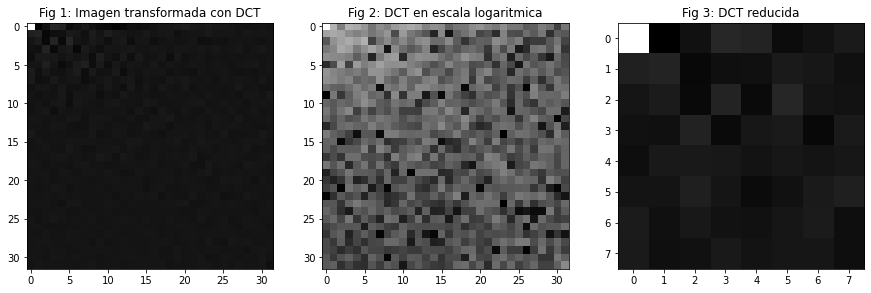

In [52]:
blocksV = int (h/B) # numero de  bloques en la vertical = 1
blocksH = int(w/B) # numero de bloques en la horizonatl = 1

vis0 = np.zeros((h,w), np.float32) # imagen auxiliar (32,32)
Trans = np.zeros((h,w), np.float32) # Imagen transformada (32,32)
vis0[:h, :w] = resized # Guardamos la imagen lenna en vis0

for row in range(blocksV):
    for col in range(blocksH):
        currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B]) # Aplicamos la DCT a bloques de tamaño (32x32)
        Trans[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock # Guardamos estos arreglos en Trans

## Visualizamos la DCT en escala logarítmica 
absoluto = np.abs(Trans)
esc_log = np.log10(absoluto + 1)

## Reduciendo la DCT nos quedamos solo con la esquina superior izquierda
mat_reducida = Trans[:8,:8]

## Ploteando
plt.figure(1,figsize=(15,15))
plt.subplot(1,3,1)
plt.title("Fig 1: Imagen transformada con DCT")
plt.imshow(Trans,cmap='gray')
plt.subplot(1,3,2)
plt.title("Fig 2: DCT en escala logaritmica")
plt.imshow(esc_log,cmap='gray')
plt.subplot(1,3,3)
plt.title("Fig 3: DCT reducida")
plt.imshow(mat_reducida,cmap='gray')
plt.show()

Los valores de los pixeles de la **Fig1** representan los coeficientes sobre los cuales se multiplicaran las funciones base para obtener la imagen original de 32 x 32 pixeles.

In [53]:
# Hallamos el promedio de las bajas frecuencias
suma = 0
count = 0
for i in range(mat_reducida.shape[0]):
    for j in range(mat_reducida.shape[1]):
        if [i,j] != [0,0]:
            suma = suma + mat_reducida[i][j]
            count = count + 1
mean = suma/count
print("Valor promedio:{}".format(mean))

Valor promedio:15.286521555885436


El PHash de la imagen es: 1001100111000110110101000010110101110101001000111010011010010110


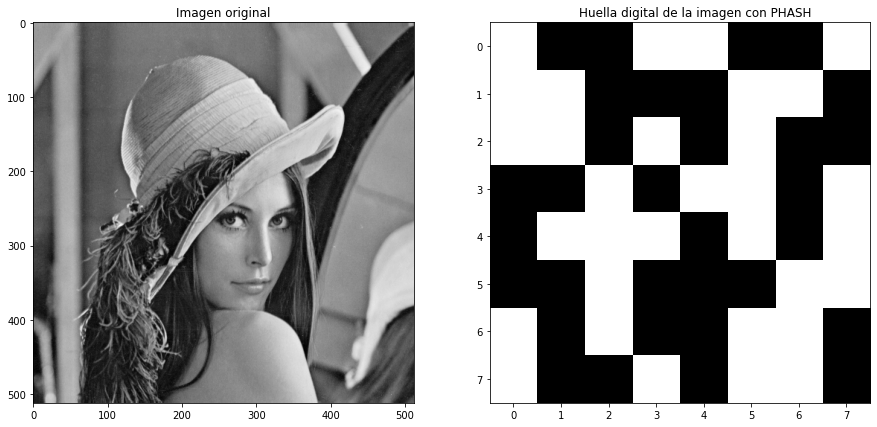

In [67]:
hash_lenna = []
huella_phash = np.zeros((mat_reducida.shape[0],mat_reducida.shape[1]))
for i in range(mat_reducida.shape[0]):
    for j in range(mat_reducida.shape[1]):
        if mat_reducida[i][j] > mean:
            hash_lenna.append('1')
            huella_phash[i][j] = 1
        else:
            hash_lenna.append('0')
            huella_phash[i][j] = 0
hash_lenna = ''.join(hash_lenna)
print("El PHash de la imagen es: {}".format(hash_lenna))

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(lenna,cmap='gray')
plt.subplot(1,2,2)
plt.title("        Huella digital de la imagen con PHASH")
plt.imshow(huella_phash,cmap='gray')
plt.show()

## Pruebas

# 3.DHash

Este algoritmo consiste en estos 4 pasos:

1. **Reducir tamaño** . La forma más rápida de eliminar las altas frecuencias y los detalles es encoger la imagen. En este caso, se acopla a 9x8 para que haya 72 píxeles en total.Al ignorar el tamaño y la relación de aspecto, este hash coincidirá con cualquier imagen similar independientemente de cómo se estire.


2. **Reducir el color** . Convierta la imagen en una imagen en escala de grises. Esto cambia el hash de 72 píxeles a un total de 72 colores. (Para un rendimiento óptimo, reduzca el color antes de escalar o realice la escala y la reducción de color al mismo tiempo).


3. **Calcule la diferencia** . El algoritmo dHash funciona sobre la diferencia entre píxeles adyacentes. Esto identifica la dirección relativa del gradiente. En este caso, los 9 píxeles por fila producen 8 diferencias entre los píxeles adyacentes. Ocho filas de ocho diferencias se convierten en 64 bits.


4. **Asignar bits** . Cada bit se establece simplemente en función de si el píxel izquierdo es más brillante que el píxel derecho. El orden no importa, siempre y cuando sea coherente. (Yo uso un "1" para indicar que P [x] <P [x + 1] y establezco los bits de izquierda a derecha, de arriba a abajo usando big-endian.)

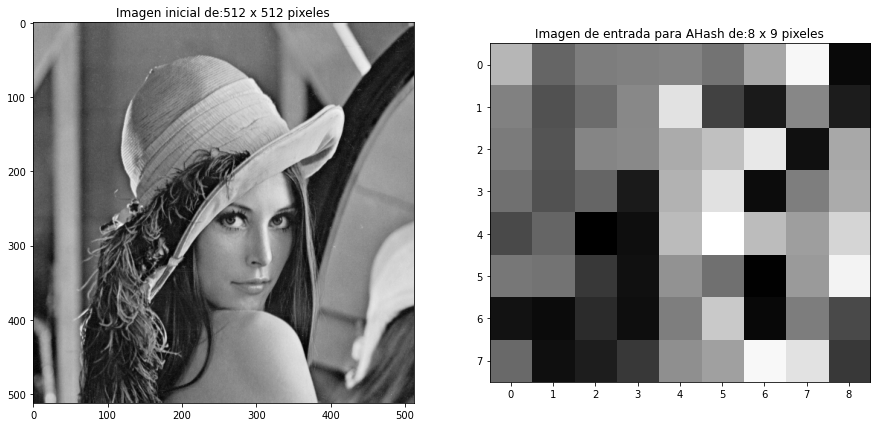

In [55]:
lenna = cv2.imread("Lenna.png")
lenna = cv2.cvtColor(lenna,cv2.COLOR_BGR2GRAY)
hashSize = 8
resized = cv2.resize(lenna, (hashSize + 1, hashSize))

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen inicial de:{} x {} pixeles".format(lenna.shape[0],lenna.shape[1]))
plt.imshow(lenna,cmap='gray')
plt.subplot(1,2,2)
plt.title("Imagen de entrada para AHash de:{} x {} pixeles".format(resized.shape[0],resized.shape[1]))
plt.imshow(resized,cmap='gray')
plt.show()

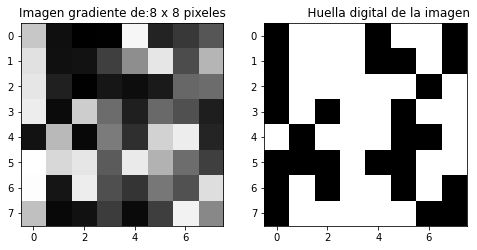

In [58]:
gradiente = resized[:, 1:] - resized[:, :-1]
diff = resized[:, 1:] > resized[:, :-1] 
plt.figure(1,figsize=(8,16))
plt.subplot(1,2,1)
plt.title("Imagen gradiente de:{} x {} pixeles".format(gradiente.shape[0],gradiente.shape[1]))
plt.imshow(gradiente,cmap='gray')
plt.subplot(1,2,2)
plt.title("            Huella digital de la imagen")
plt.imshow(diff,cmap='gray')
plt.show()

El Dhash de la imagen es: 0111011001110010011111010101101110111001000100110101101001111100


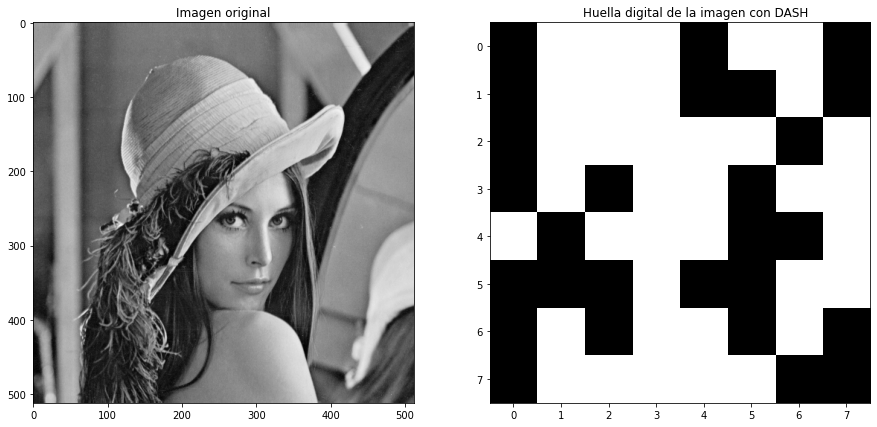

In [69]:
Dhash = []
for v in diff.flatten():
    if v == False :
        Dhash.append('0')
    else:
        Dhash.append('1')

Dhash = ''.join(Dhash)
Dhash_numeric = int(Dhash)

print("El Dhash de la imagen es: {}".format(Dhash))

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(lenna,cmap='gray')
plt.subplot(1,2,2)
plt.title("        Huella digital de la imagen con DASH")
plt.imshow(diff,cmap='gray')
plt.show()

## Pruebas

In [ ]:
plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Imagen con Filtro Gaussiano")
plt.imshow(gauss,cmap='gray')
plt.subplot(1,2,2)
plt.title("Imagen con DCT")
plt.imshow(dct,cmap='gray')
plt.show()

# 4.WHash

La Transformación de Ondas Discretas (DWT) es otra forma de representación de frecuencia. Las populares transformaciones DCT y Fourier utilizan un conjunto de funciones sin \ cos como base: sin (x), sin (2x), sin (3x), etc. En contraste, DWT usa una sola función como base pero en diferentes formas. : escalado y desplazado. La función base se puede cambiar y es por eso que podemos tener wavelet de Haar, wavelet de Daubechie-4, etc. Este efecto de escala nos da una gran “representación de frecuencia de tiempo” cuando la parte de baja frecuencia se ve similar a la señal original.


Hay una gran biblioteca de Python para wavelets: pywt . Usé esta biblioteca para implementar el método whash () para la biblioteca imagehash. Por defecto, whash () calcula hash 8x8 usando la transformación Haar. Además, el método elimina la frecuencia de Haar más baja LL (máx.). La frecuencia más baja consiste en un solo punto de datos / píxel y este punto representa el contraste de la imagen y no es tan útil para el hash.

## Pruebas

# Fuentes

1. http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html
2. http://www.hackerfactor.com/blog/index.php?/archives/529-Kind-of-Like-That.html
3. https://www.pyimagesearch.com/2017/11/27/image-hashing-opencv-python/
4. https://www.pyimagesearch.com/2019/08/26/building-an-image-hashing-search-engine-with-vp-trees-and-opencv/
5. https://fullstackml.com/wavelet-image-hash-in-python-3504fdd282b5
6. https://github.com/JohannesBuchner/imagehash
7. https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/transforms.html
8. https://programmerclick.com/article/3826156660/
9. https://programmerclick.com/article/89531536931/
10. http://hackerfactor.com/blog/index.php?/archives/355-How-I-Met-Your-Mother-Through-Photoshop.html